# Single Optimizer Example

This notebook demonstrates how to run a single portfolio optimizer from the AlloOptim library.

## 1. Import Libraries

Import the necessary libraries for portfolio optimization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# AlloOptim imports
from allo_optim.optimizer.efficient_frontier.efficient_frontier_optimizer import MaxSharpeOptimizer

print("Libraries imported successfully!")

INFO:allo_optim:AlloOptim package initialized successfully


Libraries imported successfully!


## 2. Create Sample Portfolio Data

Create sample expected returns and covariance matrix for a portfolio of 5 assets.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Define asset names
asset_names = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]

# Create sample expected returns (annualized)
expected_returns = pd.Series([0.12, 0.10, 0.11, 0.13, 0.15], index=asset_names)

# Create sample covariance matrix
cov_matrix = pd.DataFrame(
    [
        [0.04, 0.01, 0.015, 0.012, 0.02],
        [0.01, 0.05, 0.012, 0.008, 0.018],
        [0.015, 0.012, 0.03, 0.011, 0.016],
        [0.012, 0.008, 0.011, 0.06, 0.022],
        [0.02, 0.018, 0.016, 0.022, 0.08]
    ],
    index=asset_names,
    columns=asset_names
)

print("Expected Returns:")
print(expected_returns)
print("\nCovariance Matrix:")
print(cov_matrix)

Expected Returns:
AAPL     0.12
GOOGL    0.10
MSFT     0.11
AMZN     0.13
TSLA     0.15
dtype: float64

Covariance Matrix:
        AAPL  GOOGL   MSFT   AMZN   TSLA
AAPL   0.040  0.010  0.015  0.012  0.020
GOOGL  0.010  0.050  0.012  0.008  0.018
MSFT   0.015  0.012  0.030  0.011  0.016
AMZN   0.012  0.008  0.011  0.060  0.022
TSLA   0.020  0.018  0.016  0.022  0.080


## 3. Run the Optimizer

Initialize and run the Maximum Sharpe Ratio optimizer.

In [5]:
# Initialize the optimizer
optimizer = MaxSharpeOptimizer()

# Run the optimization
weights = optimizer.allocate(expected_returns, cov_matrix)

print(f"Optimizer: {optimizer.name}")
print("\nOptimal Portfolio Weights:")
print(weights)
print(f"\nTotal weight: {weights.sum():.4f}")

Optimizer: MaxSharpe

Optimal Portfolio Weights:
AAPL     0.239218
GOOGL    0.143969
MSFT     0.309047
AMZN     0.201928
TSLA     0.105839
dtype: float64

Total weight: 1.0000


## 4. Visualize Results

Create a simple bar chart showing the portfolio allocation.

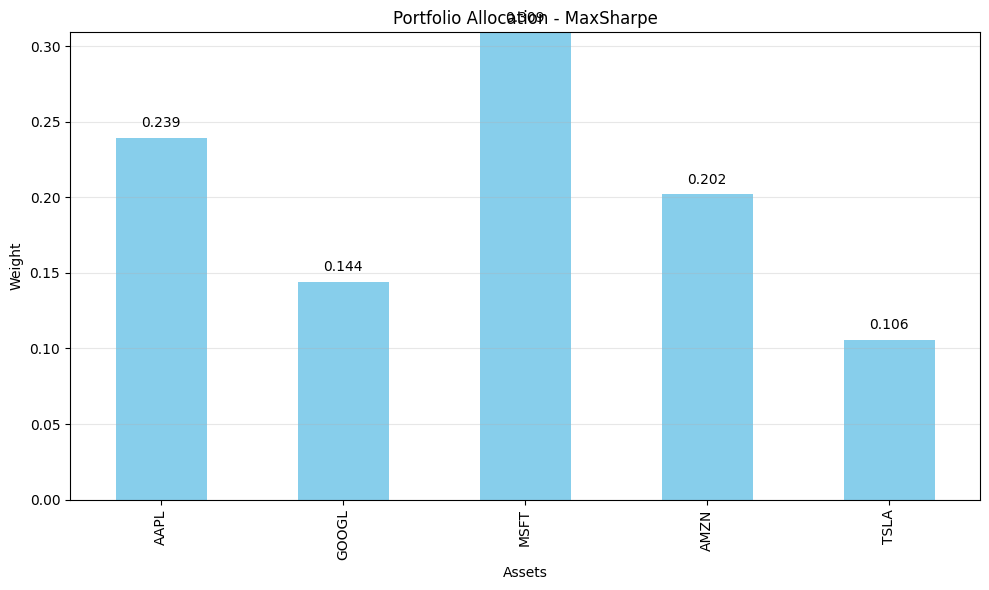

✅ Optimization completed successfully!


In [7]:
# Create a bar chart of the portfolio weights
plt.figure(figsize=(10, 6))
weights.plot(kind='bar', color='skyblue')
plt.title(f'Portfolio Allocation - {optimizer.name}')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.ylim(0, max(weights.max(), 0.3))  # Set y-axis limit
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(weights):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✅ Optimization completed successfully!")